In [49]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:

import pandas as pd

df = pd.read_csv('data-final.csv', delimiter="\t")

In [3]:
df

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,2016-03-03 02:01:01,768.0,1024.0,9.0,234.0,6,1,GB,51.5448,0.1991
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,2016-03-03 02:01:20,1360.0,768.0,12.0,179.0,11,1,MY,3.1698,101.706
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,2016-03-03 02:01:56,1366.0,768.0,3.0,186.0,7,1,GB,54.9119,-1.3833
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,2016-03-03 02:02:02,1920.0,1200.0,186.0,219.0,7,1,GB,51.75,-1.25
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,2016-03-03 02:02:57,1366.0,768.0,8.0,315.0,17,2,KE,1.0,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015336,4.0,2.0,4.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,...,2018-11-08 12:04:58,1920.0,1080.0,3.0,160.0,10,2,US,39.9883,-75.2208
1015337,4.0,3.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,3.0,...,2018-11-08 12:07:18,1920.0,1080.0,3.0,122.0,7,1,US,38.0,-97.0
1015338,4.0,2.0,4.0,3.0,5.0,1.0,4.0,2.0,4.0,4.0,...,2018-11-08 12:07:49,1920.0,1080.0,2.0,135.0,12,6,US,36.1473,-86.777
1015339,2.0,4.0,3.0,4.0,2.0,2.0,1.0,4.0,2.0,4.0,...,2018-11-08 12:08:34,1920.0,1080.0,6.0,212.0,8,1,US,34.1067,-117.8067


In [4]:
columns = df.columns

In [5]:
for column in columns:
    print(column)

EXT1
EXT2
EXT3
EXT4
EXT5
EXT6
EXT7
EXT8
EXT9
EXT10
EST1
EST2
EST3
EST4
EST5
EST6
EST7
EST8
EST9
EST10
AGR1
AGR2
AGR3
AGR4
AGR5
AGR6
AGR7
AGR8
AGR9
AGR10
CSN1
CSN2
CSN3
CSN4
CSN5
CSN6
CSN7
CSN8
CSN9
CSN10
OPN1
OPN2
OPN3
OPN4
OPN5
OPN6
OPN7
OPN8
OPN9
OPN10
EXT1_E
EXT2_E
EXT3_E
EXT4_E
EXT5_E
EXT6_E
EXT7_E
EXT8_E
EXT9_E
EXT10_E
EST1_E
EST2_E
EST3_E
EST4_E
EST5_E
EST6_E
EST7_E
EST8_E
EST9_E
EST10_E
AGR1_E
AGR2_E
AGR3_E
AGR4_E
AGR5_E
AGR6_E
AGR7_E
AGR8_E
AGR9_E
AGR10_E
CSN1_E
CSN2_E
CSN3_E
CSN4_E
CSN5_E
CSN6_E
CSN7_E
CSN8_E
CSN9_E
CSN10_E
OPN1_E
OPN2_E
OPN3_E
OPN4_E
OPN5_E
OPN6_E
OPN7_E
OPN8_E
OPN9_E
OPN10_E
dateload
screenw
screenh
introelapse
testelapse
endelapse
IPC
country
lat_appx_lots_of_err
long_appx_lots_of_err


In [6]:
# **************

In [7]:
import numpy as np

In [8]:
 X = df[df.columns[0:50]]

In [9]:
pd.set_option('display.max_columns', None)

In [10]:
X.head(2)

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,4.0,4.0,2.0,4.0,4.0,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,2.0,3.0,4.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,1.0,4.0,1.0,5.0,1.0,5.0,3.0,4.0,5.0,3.0,3.0,2.0,5.0,3.0,3.0,1.0,3.0,3.0,5.0,3.0,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0


In [11]:
extroversion_score =  df.EXT1 - df.EXT2 + df.EXT3 - df.EXT4 + df.EXT5 - df.EXT6 + df.EXT7 - df.EXT8 +df.EXT9 - df.EXT10

neuroticism_score =   df.EST1 - df.EST2 + df.EST3 - df.EST4 + df.EST5 + df.EST6 + df.EST7 + df.EST8 + df.EST9 + df.EST10

agreeableness_score = -df.AGR1 + df.AGR2 - df.AGR3 + df.AGR4 - df.AGR5 - df.AGR6 + df.AGR7 - df.AGR8 + df.AGR9 + df.AGR10

conscientiousness_score =  df.CSN1 - df.CSN2 + df.CSN3 - df.CSN4 + df.CSN5- df.CSN6 + df.CSN7 - df.CSN8 + df.CSN9 + df.CSN10

openness_score =  df.OPN1 - df.OPN2 + df.OPN3 - df.OPN4 + df.OPN5 - df.OPN6 + df.OPN7 + df.OPN8 + df.OPN9 + df.OPN10

In [12]:
X['all_extroversion'] = extroversion_score


C:\Users\damindu pahasara\AppData\Local\Temp\ipykernel_21136\2341910164.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['all_extroversion'] = extroversion_score


In [13]:
X['all_neuroticism'] = neuroticism_score


C:\Users\damindu pahasara\AppData\Local\Temp\ipykernel_21136\504828003.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['all_neuroticism'] = neuroticism_score


In [14]:
X["all_agreeableness"] = agreeableness_score

C:\Users\damindu pahasara\AppData\Local\Temp\ipykernel_21136\1687113073.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["all_agreeableness"] = agreeableness_score


In [15]:
X["all_conscientiousness"] = conscientiousness_score

C:\Users\damindu pahasara\AppData\Local\Temp\ipykernel_21136\75282200.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["all_conscientiousness"] = conscientiousness_score


In [16]:
X["all_openness"] = openness_score

C:\Users\damindu pahasara\AppData\Local\Temp\ipykernel_21136\838656696.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["all_openness"] = openness_score


In [17]:
X

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,all_extroversion,all_neuroticism,all_agreeableness,all_conscientiousness,all_openness
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,4.0,4.0,2.0,4.0,4.0,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0,16.0,12.0,5.0,8.0,27.0
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,2.0,3.0,4.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,1.0,4.0,1.0,5.0,1.0,5.0,3.0,4.0,5.0,3.0,3.0,2.0,5.0,3.0,3.0,1.0,3.0,3.0,5.0,3.0,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0,-10.0,13.0,8.0,13.0,17.0
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,4.0,1.0,4.0,2.0,4.0,1.0,4.0,4.0,3.0,4.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,4.0,2.0,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0,-5.0,14.0,4.0,10.0,23.0
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,4.0,3.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,4.0,3.0,4.0,2.0,4.0,4.0,4.0,1.0,2.0,2.0,3.0,1.0,4.0,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0,-4.0,17.0,2.0,1.0,21.0
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,1.0,5.0,5.0,3.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,5.0,3.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,1.0,5.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0,-1.0,7.0,8.0,24.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015336,4.0,2.0,4.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0,4.0,3.0,4.0,3.0,3.0,3.0,5.0,4.0,2.0,5.0,2.0,4.0,2.0,4.0,4.0,4.0,2.0,3.0,3.0,3.0,4.0,4.0,4.0,2.0,3.0,3.0,2.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,2.0,4.0,4.0,21.0,2.0,7.0,15.0
1015337,4.0,3.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,3.0,4.0,3.0,5.0,1.0,5.0,5.0,4.0,4.0,4.0,5.0,2.0,4.0,1.0,4.0,3.0,5.0,3.0,3.0,5.0,3.0,3.0,2.0,3.0,4.0,3.0,3.0,2.0,3.0,2.0,3.0,4.0,1.0,5.0,1.0,5.0,1.0,3.0,4.0,5.0,4.0,2.0,32.0,5.0,4.0,27.0
1015338,4.0,2.0,4.0,3.0,5.0,1.0,4.0,2.0,4.0,4.0,3.0,2.0,4.0,3.0,2.0,2.0,4.0,2.0,4.0,1.0,3.0,5.0,5.0,3.0,2.0,3.0,2.0,4.0,3.0,5.0,4.0,5.0,3.0,5.0,1.0,5.0,1.0,4.0,1.0,4.0,5.0,1.0,5.0,1.0,4.0,1.0,5.0,5.0,4.0,5.0,9.0,17.0,1.0,-5.0,30.0
1015339,2.0,4.0,3.0,4.0,2.0,2.0,1.0,4.0,2.0,4.0,4.0,3.0,4.0,2.0,4.0,4.0,2.0,2.0,4.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0,2.0,4.0,4.0,3.0,4.0,2.0,4.0,2.0,2.0,2.0,4.0,2.0,4.0,4.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,5.0,5.0,3.0,-8.0,23.0,1.0,14.0,23.0


In [18]:
from sklearn.preprocessing import StandardScaler


columns_to_scale = [
    'all_extroversion',
    'all_neuroticism',
    'all_agreeableness',
    'all_openness',
    'all_conscientiousness']


scaler = StandardScaler()


X[columns_to_scale] = scaler.fit_transform(X[columns_to_scale])

C:\Users\damindu pahasara\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
C:\Users\damindu pahasara\AppData\Local\Temp\ipykernel_21136\1311787196.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[columns_to_scale] = scaler.fit_transform(X[columns_to_scale])


In [19]:
X.head(20)

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,all_extroversion,all_neuroticism,all_agreeableness,all_conscientiousness,all_openness
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,4.0,4.0,2.0,4.0,4.0,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0,1.806286,-0.764403,0.491067,-0.209371,0.972665
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,2.0,3.0,4.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,1.0,4.0,1.0,5.0,1.0,5.0,3.0,4.0,5.0,3.0,3.0,2.0,5.0,3.0,3.0,1.0,3.0,3.0,5.0,3.0,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0,-1.068339,-0.648299,1.273551,0.468951,-0.575534
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,4.0,1.0,4.0,2.0,4.0,1.0,4.0,4.0,3.0,4.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,4.0,2.0,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0,-0.515527,-0.532194,0.230239,0.061958,0.353385
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,4.0,3.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,4.0,3.0,4.0,2.0,4.0,4.0,4.0,1.0,2.0,2.0,3.0,1.0,4.0,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0,-0.404964,-0.183880,-0.291417,-1.159020,0.043745
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,1.0,5.0,5.0,3.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,5.0,3.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,1.0,5.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0,-0.073277,-1.344927,1.273551,1.961257,1.437125
5,3.0,3.0,4.0,2.0,4.0,2.0,2.0,3.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,3.0,1.0,4.0,2.0,3.0,2.0,3.0,4.0,4.0,3.0,2.0,4.0,1.0,3.0,2.0,4.0,3.0,4.0,3.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,4.0,5.0,2.0,0.258411,-0.996613,0.751895,0.468951,0.817845
6,4.0,3.0,4.0,3.0,3.0,3.0,5.0,3.0,4.0,3.0,2.0,4.0,4.0,2.0,4.0,2.0,2.0,2.0,4.0,4.0,1.0,2.0,1.0,5.0,3.0,5.0,3.0,4.0,4.0,5.0,3.0,2.0,4.0,2.0,1.0,4.0,4.0,2.0,2.0,5.0,5.0,2.0,4.0,3.0,4.0,1.0,5.0,5.0,4.0,4.0,0.590098,-0.067775,0.491067,-0.073706,0.663025
7,3.0,1.0,5.0,2.0,5.0,2.0,5.0,2.0,3.0,2.0,2.0,4.0,2.0,4.0,2.0,1.0,2.0,1.0,1.0,1.0,2.0,5.0,2.0,4.0,3.0,2.0,2.0,4.0,4.0,4.0,5.0,1.0,5.0,1.0,4.0,2.0,3.0,2.0,5.0,5.0,4.0,1.0,3.0,1.0,5.0,1.0,4.0,3.0,4.0,5.0,1.364036,-1.693241,0.751895,1.554265,0.663025
8,2.0,2.0,3.0,3.0,4.0,2.0,2.0,2.0,4.0,4.0,3.0,4.0,4.0,1.0,2.0,2.0,3.0,2.0,3.0,4.0,1.0,5.0,1.0,5.0,1.0,3.0,1.0,4.0,4.0,4.0,3.0,3.0,4.0,0.0,3.0,4.0,1.0,2.0,1.0,4.0,4.0,1.0,5.0,1.0,4.0,1.0,5.0,2.0,5.0,5.0,0.258411,-0.067775,1.534379,-0.345035,0.972665
9,1.0,5.0,3.0,5.0,2.0,3.0,2.0,4.0,5.0,4.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,5.0,3.0,5.0,1.0,5.0,3.0,4.0,2.0,3.0,2.0,2.0,5.0,1.0,5.0,1.0,4.0,3.0,4.0,2.0,2.0,3.0,1.0,3.0,1.0,3.0,3.0,4.0,3.0,3.0,3.0,-0.847214,0.048330,-2.638870,-2.244334,-0.575534


In [20]:
traits = ['all_extroversion', 'all_neuroticism', 'all_agreeableness', 'all_conscientiousness', 'all_openness']
X['highest_trait'] = X[traits].idxmax(axis=1)


C:\Users\damindu pahasara\AppData\Local\Temp\ipykernel_21136\3975643455.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['highest_trait'] = X[traits].idxmax(axis=1)


In [21]:
extroversion_count = (X['highest_trait'] == 'all_extroversion').sum()


print("Count of highest_trait as 'all_extroversion':", extroversion_count)

Count of highest_trait as 'all_extroversion': 210239


In [22]:
agreeableness_count = (X['highest_trait'] == 'all_agreeableness').sum()


print("Count of highest_trait as 'all_agreeableness':", agreeableness_count)

Count of highest_trait as 'all_agreeableness': 171632


In [23]:
neuroticism_count = (X['highest_trait'] == 'all_neuroticism').sum()


print("Count of highest_trait as 'all_neuroticism':", neuroticism_count)

Count of highest_trait as 'all_neuroticism': 252974


In [24]:
conscientiousness_count = (X['highest_trait'] == 'all_conscientiousness').sum()


print("Count of highest_trait as 'all_conscientiousness':", conscientiousness_count)

Count of highest_trait as 'all_conscientiousness': 207603


In [25]:
openness_count = (X['highest_trait'] == 'all_openness').sum()


print("Count of highest_trait as 'all_openness':", openness_count)

Count of highest_trait as 'all_openness': 171110


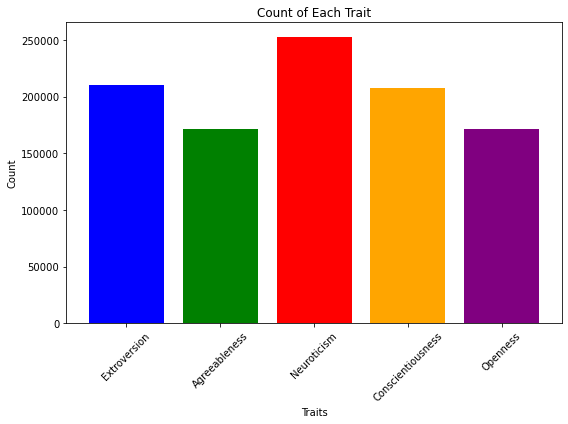

In [26]:
import matplotlib.pyplot as plt
labels = ['Extroversion', 'Agreeableness', 'Neuroticism', 'Conscientiousness', 'Openness']
counts = [extroversion_count, agreeableness_count, neuroticism_count, conscientiousness_count, openness_count]

plt.figure(figsize=(8, 6))
plt.bar(labels, counts, color=['blue', 'green', 'red', 'orange', 'purple'])
plt.xlabel('Traits')
plt.ylabel('Count')
plt.title('Count of Each Trait')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## model

In [27]:
X.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,all_extroversion,all_neuroticism,all_agreeableness,all_conscientiousness,all_openness,highest_trait
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,4.0,4.0,2.0,4.0,4.0,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0,1.806286,-0.764403,0.491067,-0.209371,0.972665,all_extroversion
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,2.0,3.0,4.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,1.0,4.0,1.0,5.0,1.0,5.0,3.0,4.0,5.0,3.0,3.0,2.0,5.0,3.0,3.0,1.0,3.0,3.0,5.0,3.0,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0,-1.068339,-0.648299,1.273551,0.468951,-0.575534,all_agreeableness
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,4.0,1.0,4.0,2.0,4.0,1.0,4.0,4.0,3.0,4.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,4.0,2.0,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0,-0.515527,-0.532194,0.230239,0.061958,0.353385,all_openness
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,4.0,3.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,4.0,3.0,4.0,2.0,4.0,4.0,4.0,1.0,2.0,2.0,3.0,1.0,4.0,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0,-0.404964,-0.183880,-0.291417,-1.159020,0.043745,all_openness
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,1.0,5.0,5.0,3.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,5.0,3.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,1.0,5.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0,-0.073277,-1.344927,1.273551,1.961257,1.437125,all_conscientiousness


In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
label_encoder = LabelEncoder()

X['highest_trait_EN'] = label_encoder.fit_transform(X['highest_trait'])

C:\Users\damindu pahasara\AppData\Local\Temp\ipykernel_21136\3049499830.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['highest_trait_EN'] = label_encoder.fit_transform(X['highest_trait'])


In [30]:
X.head(15)

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,all_extroversion,all_neuroticism,all_agreeableness,all_conscientiousness,all_openness,highest_trait,highest_trait_EN
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,4.0,4.0,2.0,4.0,4.0,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0,1.806286,-0.764403,0.491067,-0.209371,0.972665,all_extroversion,2
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,2.0,3.0,4.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,1.0,4.0,1.0,5.0,1.0,5.0,3.0,4.0,5.0,3.0,3.0,2.0,5.0,3.0,3.0,1.0,3.0,3.0,5.0,3.0,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0,-1.068339,-0.648299,1.273551,0.468951,-0.575534,all_agreeableness,0
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,4.0,1.0,4.0,2.0,4.0,1.0,4.0,4.0,3.0,4.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,4.0,2.0,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0,-0.515527,-0.532194,0.230239,0.061958,0.353385,all_openness,4
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,4.0,3.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,4.0,3.0,4.0,2.0,4.0,4.0,4.0,1.0,2.0,2.0,3.0,1.0,4.0,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0,-0.404964,-0.183880,-0.291417,-1.159020,0.043745,all_openness,4
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,1.0,5.0,5.0,3.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,5.0,3.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,1.0,5.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0,-0.073277,-1.344927,1.273551,1.961257,1.437125,all_conscientiousness,1
5,3.0,3.0,4.0,2.0,4.0,2.0,2.0,3.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,3.0,1.0,4.0,2.0,3.0,2.0,3.0,4.0,4.0,3.0,2.0,4.0,1.0,3.0,2.0,4.0,3.0,4.0,3.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,4.0,5.0,2.0,0.258411,-0.996613,0.751895,0.468951,0.817845,all_openness,4
6,4.0,3.0,4.0,3.0,3.0,3.0,5.0,3.0,4.0,3.0,2.0,4.0,4.0,2.0,4.0,2.0,2.0,2.0,4.0,4.0,1.0,2.0,1.0,5.0,3.0,5.0,3.0,4.0,4.0,5.0,3.0,2.0,4.0,2.0,1.0,4.0,4.0,2.0,2.0,5.0,5.0,2.0,4.0,3.0,4.0,1.0,5.0,5.0,4.0,4.0,0.590098,-0.067775,0.491067,-0.073706,0.663025,all_openness,4
7,3.0,1.0,5.0,2.0,5.0,2.0,5.0,2.0,3.0,2.0,2.0,4.0,2.0,4.0,2.0,1.0,2.0,1.0,1.0,1.0,2.0,5.0,2.0,4.0,3.0,2.0,2.0,4.0,4.0,4.0,5.0,1.0,5.0,1.0,4.0,2.0,3.0,2.0,5.0,5.0,4.0,1.0,3.0,1.0,5.0,1.0,4.0,3.0,4.0,5.0,1.364036,-1.693241,0.751895,1.554265,0.663025,all_conscientiousness,1
8,2.0,2.0,3.0,3.0,4.0,2.0,2.0,2.0,4.0,4.0,3.0,4.0,4.0,1.0,2.0,2.0,3.0,2.0,3.0,4.0,1.0,5.0,1.0,5.0,1.0,3.0,1.0,4.0,4.0,4.0,3.0,3.0,4.0,0.0,3.0,4.0,1.0,2.0,1.0,4.0,4.0,1.0,5.0,1.0,4.0,1.0,5.0,2.0,5.0,5.0,0.258411,-0.067775,1.534379,-0.345035,0.972665,all_agreeableness,0
9,1.0,5.0,3.0,5.0,2.0,3.0,2.0,4.0,5.0,4.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,5.0,3.0,5.0,1.0,5.0,3.0,4.0,2.0,3.0,2.0,2.0,5.0,1.0,5.0,1.0,4.0,3.0,4.0,2.0,2.0,3.0,1.0,3.0,1.0,3.0,3.0,4.0,3.0,3.0,3.0,-0.847214,0.048330,-2.638870,-2.244334,-0.575534,all_neuroticism,3


In [31]:
final_X = X.drop(['highest_trait','all_extroversion','all_neuroticism','all_agreeableness','all_conscientiousness','all_openness'], axis=1) 

In [32]:
final_X.head(2)

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,highest_trait_EN
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,4.0,4.0,2.0,4.0,4.0,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0,2
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,2.0,3.0,4.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,1.0,4.0,1.0,5.0,1.0,5.0,3.0,4.0,5.0,3.0,3.0,2.0,5.0,3.0,3.0,1.0,3.0,3.0,5.0,3.0,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0,0


In [33]:
#!pip install tensorflow --user

In [34]:
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [35]:
final_X = final_X[final_X['highest_trait_EN'].isin([0, 1, 2, 3, 4])]

In [36]:
x = final_X.drop('highest_trait_EN', axis=1)
y = final_X['highest_trait_EN']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Nural net models test

## model 1

In [38]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(5, activation='softmax'))  # 5 classes (0 to 4)

In [39]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [40]:
print(final_X['highest_trait_EN'].value_counts())

3    252974
2    210239
1    207603
0    171632
4    171110
Name: highest_trait_EN, dtype: int64


In [41]:
print(X['highest_trait'].value_counts())

all_neuroticism          252974
all_extroversion         210239
all_conscientiousness    207603
all_agreeableness        171632
all_openness             171110
Name: highest_trait, dtype: int64


In [42]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50


20272/20272 [==============================] - 59s 3ms/step - loss: 0.1752 - accuracy: 0.9278 - val_loss: 0.1051 - val_accuracy: 0.9591
Epoch 2/50
20272/20272 [==============================] - 56s 3ms/step - loss: 0.1130 - accuracy: 0.9518 - val_loss: 0.0702 - val_accuracy: 0.9737
Epoch 3/50
20272/20272 [==============================] - 56s 3ms/step - loss: 0.0917 - accuracy: 0.9611 - val_loss: 0.0997 - val_accuracy: 0.9564
Epoch 4/50
20272/20272 [==============================] - 54s 3ms/step - loss: 0.0816 - accuracy: 0.9655 - val_loss: 0.0557 - val_accuracy: 0.9785
Epoch 5/50
20272/20272 [==============================] - 54s 3ms/step - loss: 0.0736 - accuracy: 0.9689 - val_loss: 0.0655 - val_accuracy: 0.9712
Epoch 6/50
20272/20272 [==============================] - 53s 3ms/step - loss: 0.0685 - accuracy: 0.9712 - val_loss: 0.0537 - val_accuracy: 0.9768
Epoch 7/50
20272/20272 [==============================] - 53s 3ms/step - loss: 0.0637 - accuracy: 0.9730 - val_loss:

In [43]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy * 100:.2f}%')

6335/6335 [==============================] - 14s 2ms/step - loss: 0.0205 - accuracy: 0.9931
Test accuracy: 99.31%


In [47]:
from sklearn.metrics import confusion_matrix

6335/6335 [==============================] - 11s 2ms/step


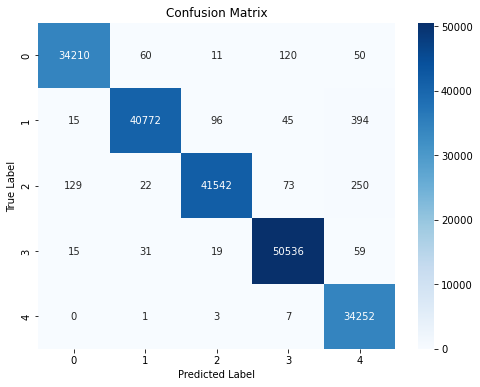

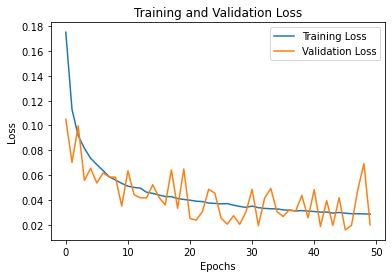

In [50]:
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=-1)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Plot training and validation loss over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# model 2

In [52]:
model = Sequential()
model.add(Dense(64, activation='tanh', input_shape=(X_train.shape[1],)))  # Tanh act

model.add(Dense(32, activation='sigmoid'))  # Sigmoid act

model.add(Dense(5, activation='softmax'))  # 5 classes (0 to 4)


model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)



Epoch 1/50
20272/20272 [==============================] - 56s 3ms/step - loss: 0.1957 - accuracy: 0.9229 - val_loss: 0.1205 - val_accuracy: 0.9508
Epoch 2/50
20272/20272 [==============================] - 54s 3ms/step - loss: 0.1268 - accuracy: 0.9470 - val_loss: 0.1139 - val_accuracy: 0.9522
Epoch 3/50
20272/20272 [==============================] - 54s 3ms/step - loss: 0.1076 - accuracy: 0.9547 - val_loss: 0.1053 - val_accuracy: 0.9541
Epoch 4/50
20272/20272 [==============================] - 53s 3ms/step - loss: 0.0977 - accuracy: 0.9588 - val_loss: 0.0909 - val_accuracy: 0.9613
Epoch 5/50
20272/20272 [==============================] - 53s 3ms/step - loss: 0.0911 - accuracy: 0.9614 - val_loss: 0.0661 - val_accuracy: 0.9732
Epoch 6/50
20272/20272 [==============================] - 54s 3ms/step - loss: 0.0871 - accuracy: 0.9635 - val_loss: 0.1006 - val_accuracy: 0.9569
Epoch 7/50
20272/20272 [==============================] - 53s 3ms/step - loss: 0.0828 - accuracy: 0.9649 - val_loss: 0

6335/6335 [==============================] - 11s 2ms/step


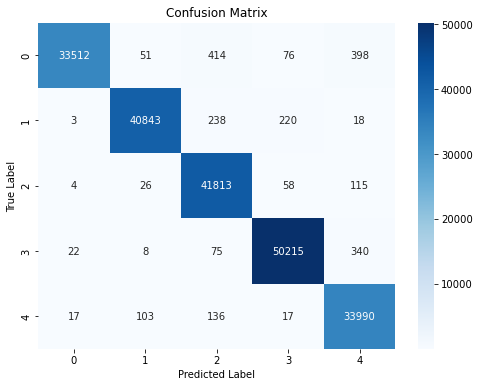

In [53]:
# Make predictions on the test set
y_pred = np.argmax(model.predict(X_test), axis=-1)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

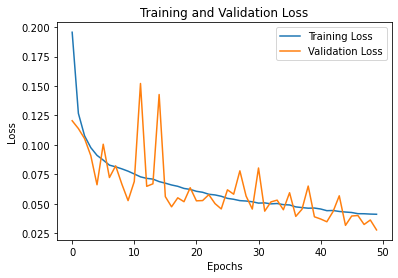

In [54]:
# Plot training and validation loss over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [55]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy * 100:.2f}%')

6335/6335 [==============================] - 14s 2ms/step - loss: 0.0281 - accuracy: 0.9885
Test accuracy: 98.85%


## model 3

In [56]:
from tensorflow.keras.layers import Activation

# Build the second model
model2 = Sequential()
model2.add(Dense(64, input_shape=(X_train.shape[1],)))
model2.add(Activation('sigmoid'))  
model2.add(Dense(32))
model2.add(Activation('tanh')) 
model2.add(Dense(5, activation='softmax'))


model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


history2 = model2.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50
20272/20272 [==============================] - 54s 3ms/step - loss: 0.1643 - accuracy: 0.9339 - val_loss: 0.1164 - val_accuracy: 0.9503
Epoch 2/50
20272/20272 [==============================] - 54s 3ms/step - loss: 0.1049 - accuracy: 0.9555 - val_loss: 0.0912 - val_accuracy: 0.9594
Epoch 3/50
20272/20272 [==============================] - 53s 3ms/step - loss: 0.0913 - accuracy: 0.9613 - val_loss: 0.0759 - val_accuracy: 0.9680
Epoch 4/50
20272/20272 [==============================] - 53s 3ms/step - loss: 0.0827 - accuracy: 0.9647 - val_loss: 0.0684 - val_accuracy: 0.9709
Epoch 5/50
20272/20272 [==============================] - 55s 3ms/step - loss: 0.0782 - accuracy: 0.9670 - val_loss: 0.0717 - val_accuracy: 0.9686
Epoch 6/50
20272/20272 [==============================] - 53s 3ms/step - loss: 0.0743 - accuracy: 0.9687 - val_loss: 0.0762 - val_accuracy: 0.9667
Epoch 7/50
20272/20272 [==============================] - 53s 3ms/step - loss: 0.0712 - accuracy: 0.9699 - val_loss: 0

6335/6335 [==============================] - 13s 2ms/step


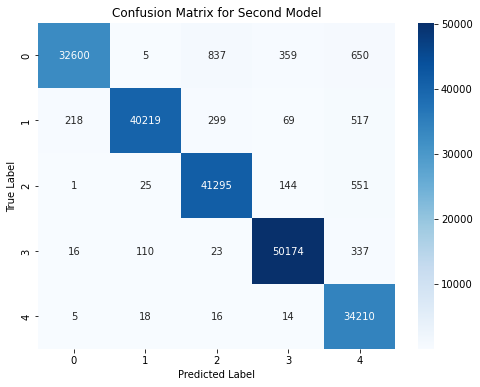

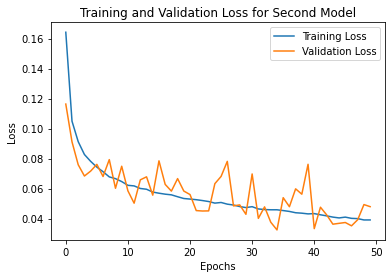

In [57]:
y_pred2 = np.argmax(model2.predict(X_test), axis=-1)

# Compute the confusion matrix for the second model
conf_matrix2 = confusion_matrix(y_test, y_pred2)

# Plot confusion matrix for the second model
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix2, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix for Second Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Plot training and validation loss over epochs for the second model
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss for Second Model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [59]:
loss, accuracy = model2.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy * 100:.2f}%')

6335/6335 [==============================] - 13s 2ms/step - loss: 0.0494 - accuracy: 0.9792
Test accuracy: 97.92%
